## Business Case: Walmart - Confidence Interval and CLT

### About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide

### Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).


### Dataset

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

|Variable    |Description       |
|:--------------|:-------------------|
|User_ID:| 	User ID|
|Product_ID:| 	Product ID
|Gender:| 	Sex of User
|Age:| 	Age in bins
|Occupation:| 	Occupation(Masked)
|City_Category:| 	Category of the City (A,B,C)
|StayInCurrentCityYears:| 	Number of years stay in current city
|Marital_Status:| 	Marital Status
|ProductCategory:| 	Product Category (Masked)
|Purchase:| 	Purchase Amount


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
import io
import pandas as pd

# Upload the file
uploaded = files.upload()

# Read the file into a pandas DataFrame
# Assuming the file name is 'walmart_data.csv'
df = pd.read_csv(io.BytesIO(uploaded['walmart_data.csv']))
df.head(10)

Saving walmart_data.csv to walmart_data.csv


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [4]:
print(f"Number of rows: {df.shape[0]:,} \nNumber of columns: {df.shape[1]}")

Number of rows: 550,068 
Number of columns: 10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


##### Change the data types of - **`Occupation`**, **`Marital_Status`**, **`Product_Category`**

In [6]:
cols = ['Occupation', 'Marital_Status', 'Product_Category']
df[cols] = df[cols].astype('object')

In [7]:
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,object
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,object
Product_Category,object
Purchase,int64


In [8]:
df.memory_usage()

,0
Index,128
User_ID,4400544
Product_ID,4400544
Gender,4400544
Age,4400544
Occupation,4400544
City_Category,4400544
Stay_In_Current_City_Years,4400544
Marital_Status,4400544
Product_Category,4400544


In [9]:
df.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


#### Observations
- There are no missing values in the dataset.
- Purchase amount might have outliers.

In [10]:
# checking null values
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


**How many users are there in the dataset?**

In [11]:
df['User_ID'].nunique()

5891

**How many products are there?**

In [12]:
df['Product_ID'].nunique()

3631

**Value_counts for the following:**
- Gender
- Age
- Occupation
- City_Category
- Stay_In_Current_City_Years
- Marital_Status
- Product_Category

In [13]:
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
df[categorical_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df)

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Occupation                 0      0.126599
                           1      0.086218
                           2      0.048336
                           3      0.032087
                           4      0.131453
                           5      0.022137
                           6      0.037005
                           7      0.107501
                           8      0.002811
                           9      0.011437
                           10     0.023506
                           11     0.021063
                           12     0.056682
                           13     0.014049
                           14     0.049647
                           15     0.022115
                           16     0.046123
                           17     0.072796
                           18     0.012039
                           19     0.015382
                           20     0.061014
Product_Category           1      0.255201
                           2      0.043384
                           3      0.036746
                           4      0.021366
                           5      0.274390
                           6      0.037206
                           7      0.006765
                           8      0.207111
                           9      0.000745
                           10     0.009317
                           11     0.044153
                           12     0.007175
                           13     0.010088
                           14     0.002769
                           15     0.011435
                           16     0.017867
                           17     0.001051
                           18     0.005681
                           19     0.002914
                           20     0.004636
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

#### Observations
- ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
- 75% of the users are **`Male`** and 25% are **`Female`**
- 60% Single, 40% Married
- 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
- Total of 20 product categories are there
- There are 20 differnent types of occupations in the city

### Univariate Analysis

##### Understanding the distribution of data and detecting outlies for continuous variables

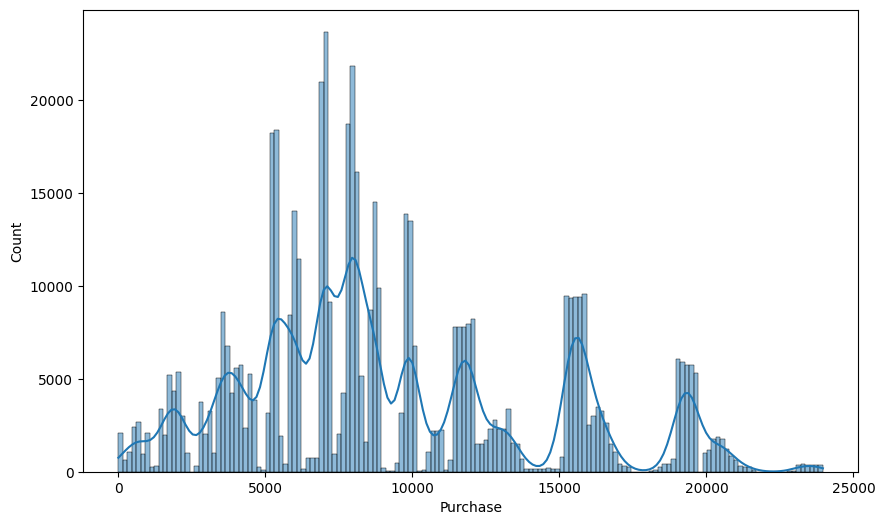

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

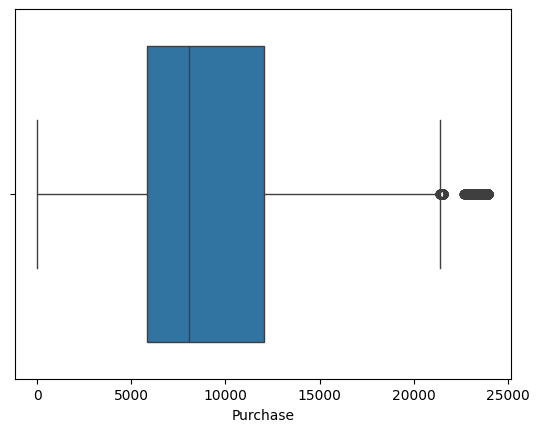

In [15]:
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()

#### Observation
- Purchase is having outliers

#### Understanding the distribution of data for the categorical variables
- Gender
- Age
- Occupation
- City_Category
- Stay_In_Current_City_Years
- Marital_Status
- Product_Category

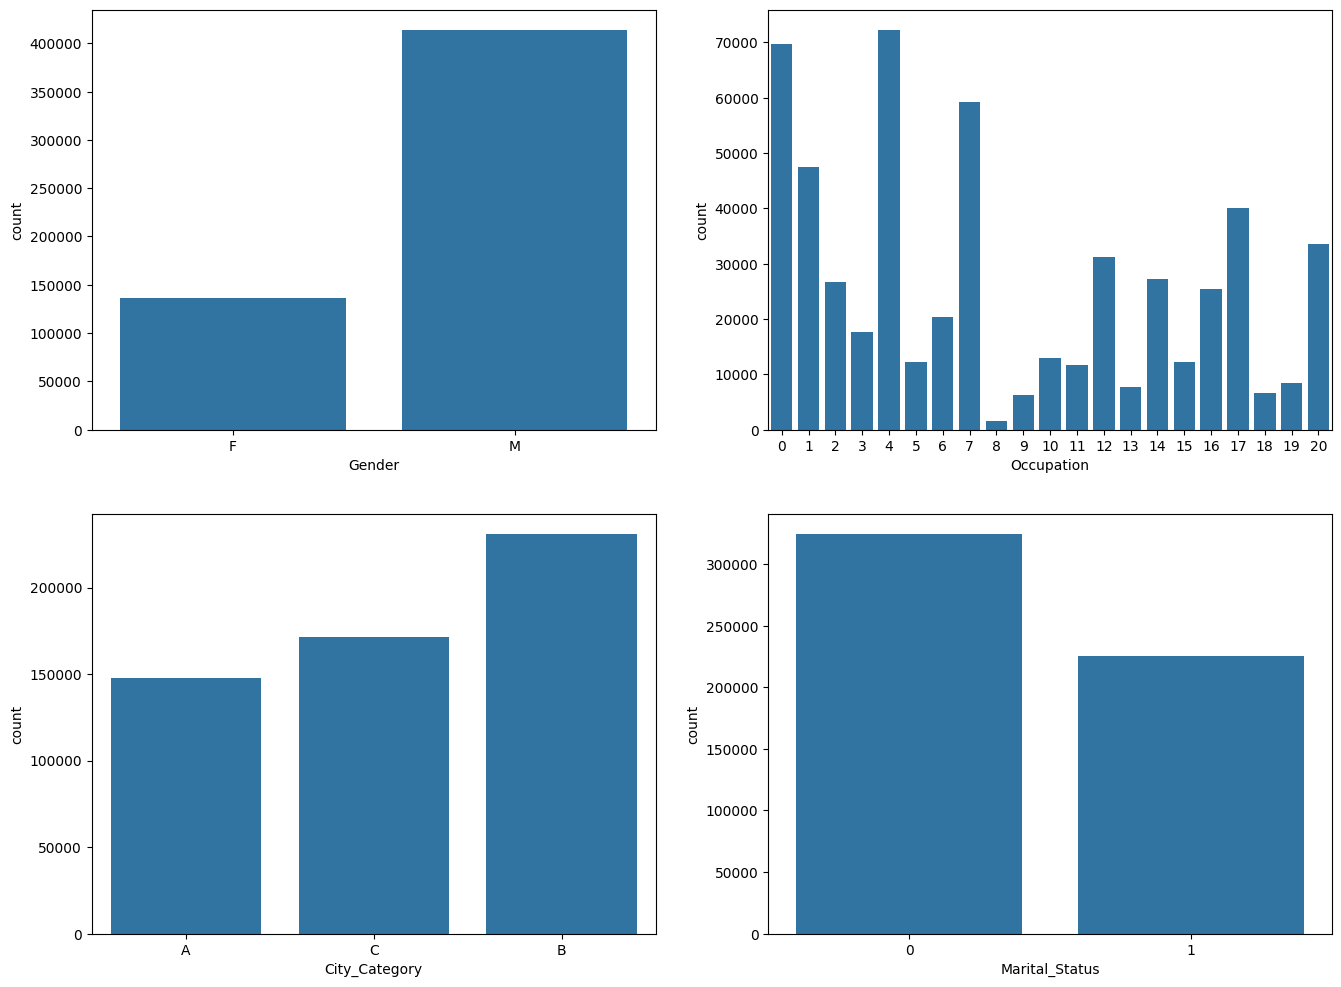

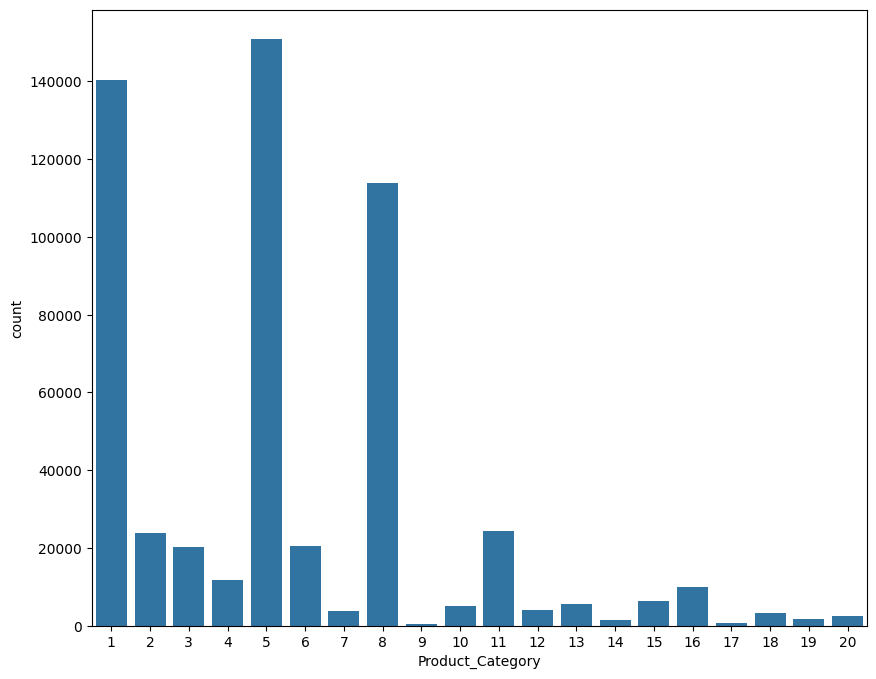

In [16]:
categorical_cols = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Product_Category')
plt.show()

#### Observations
- Most of the users are `Male`
- There are 20 different types of `Occupation` and `Product_Category`
- More users belong to `B` `City_Category`
- More users are `Single` as compare to `Married`
- `Product_Category` - `1, 5, 8, & 11` have highest purchasing frequency.

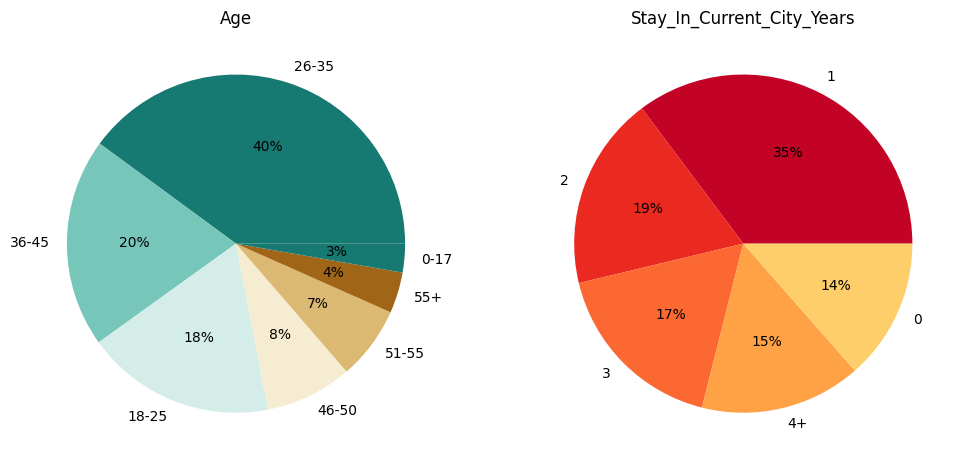

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

data = df['Age'].value_counts(normalize=True)*100
palette_color = sns.color_palette('BrBG_r')
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[0].set_title("Age")

data = df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
palette_color = sns.color_palette('YlOrRd_r')
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years")


plt.show()

#### Observations
- ~ 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
- 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years, 15% from 4 years+, 14% are new to city

### Bi-variate Analysis

<ipython-input-18-88a4bed87712>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
<ipython-input-18-88a4bed87712>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
<ipython-input-18-88a4bed87712>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
<ipython-input-18-88a4bed87712>:9: FutureWarning: 

Passing `palette` without assigni

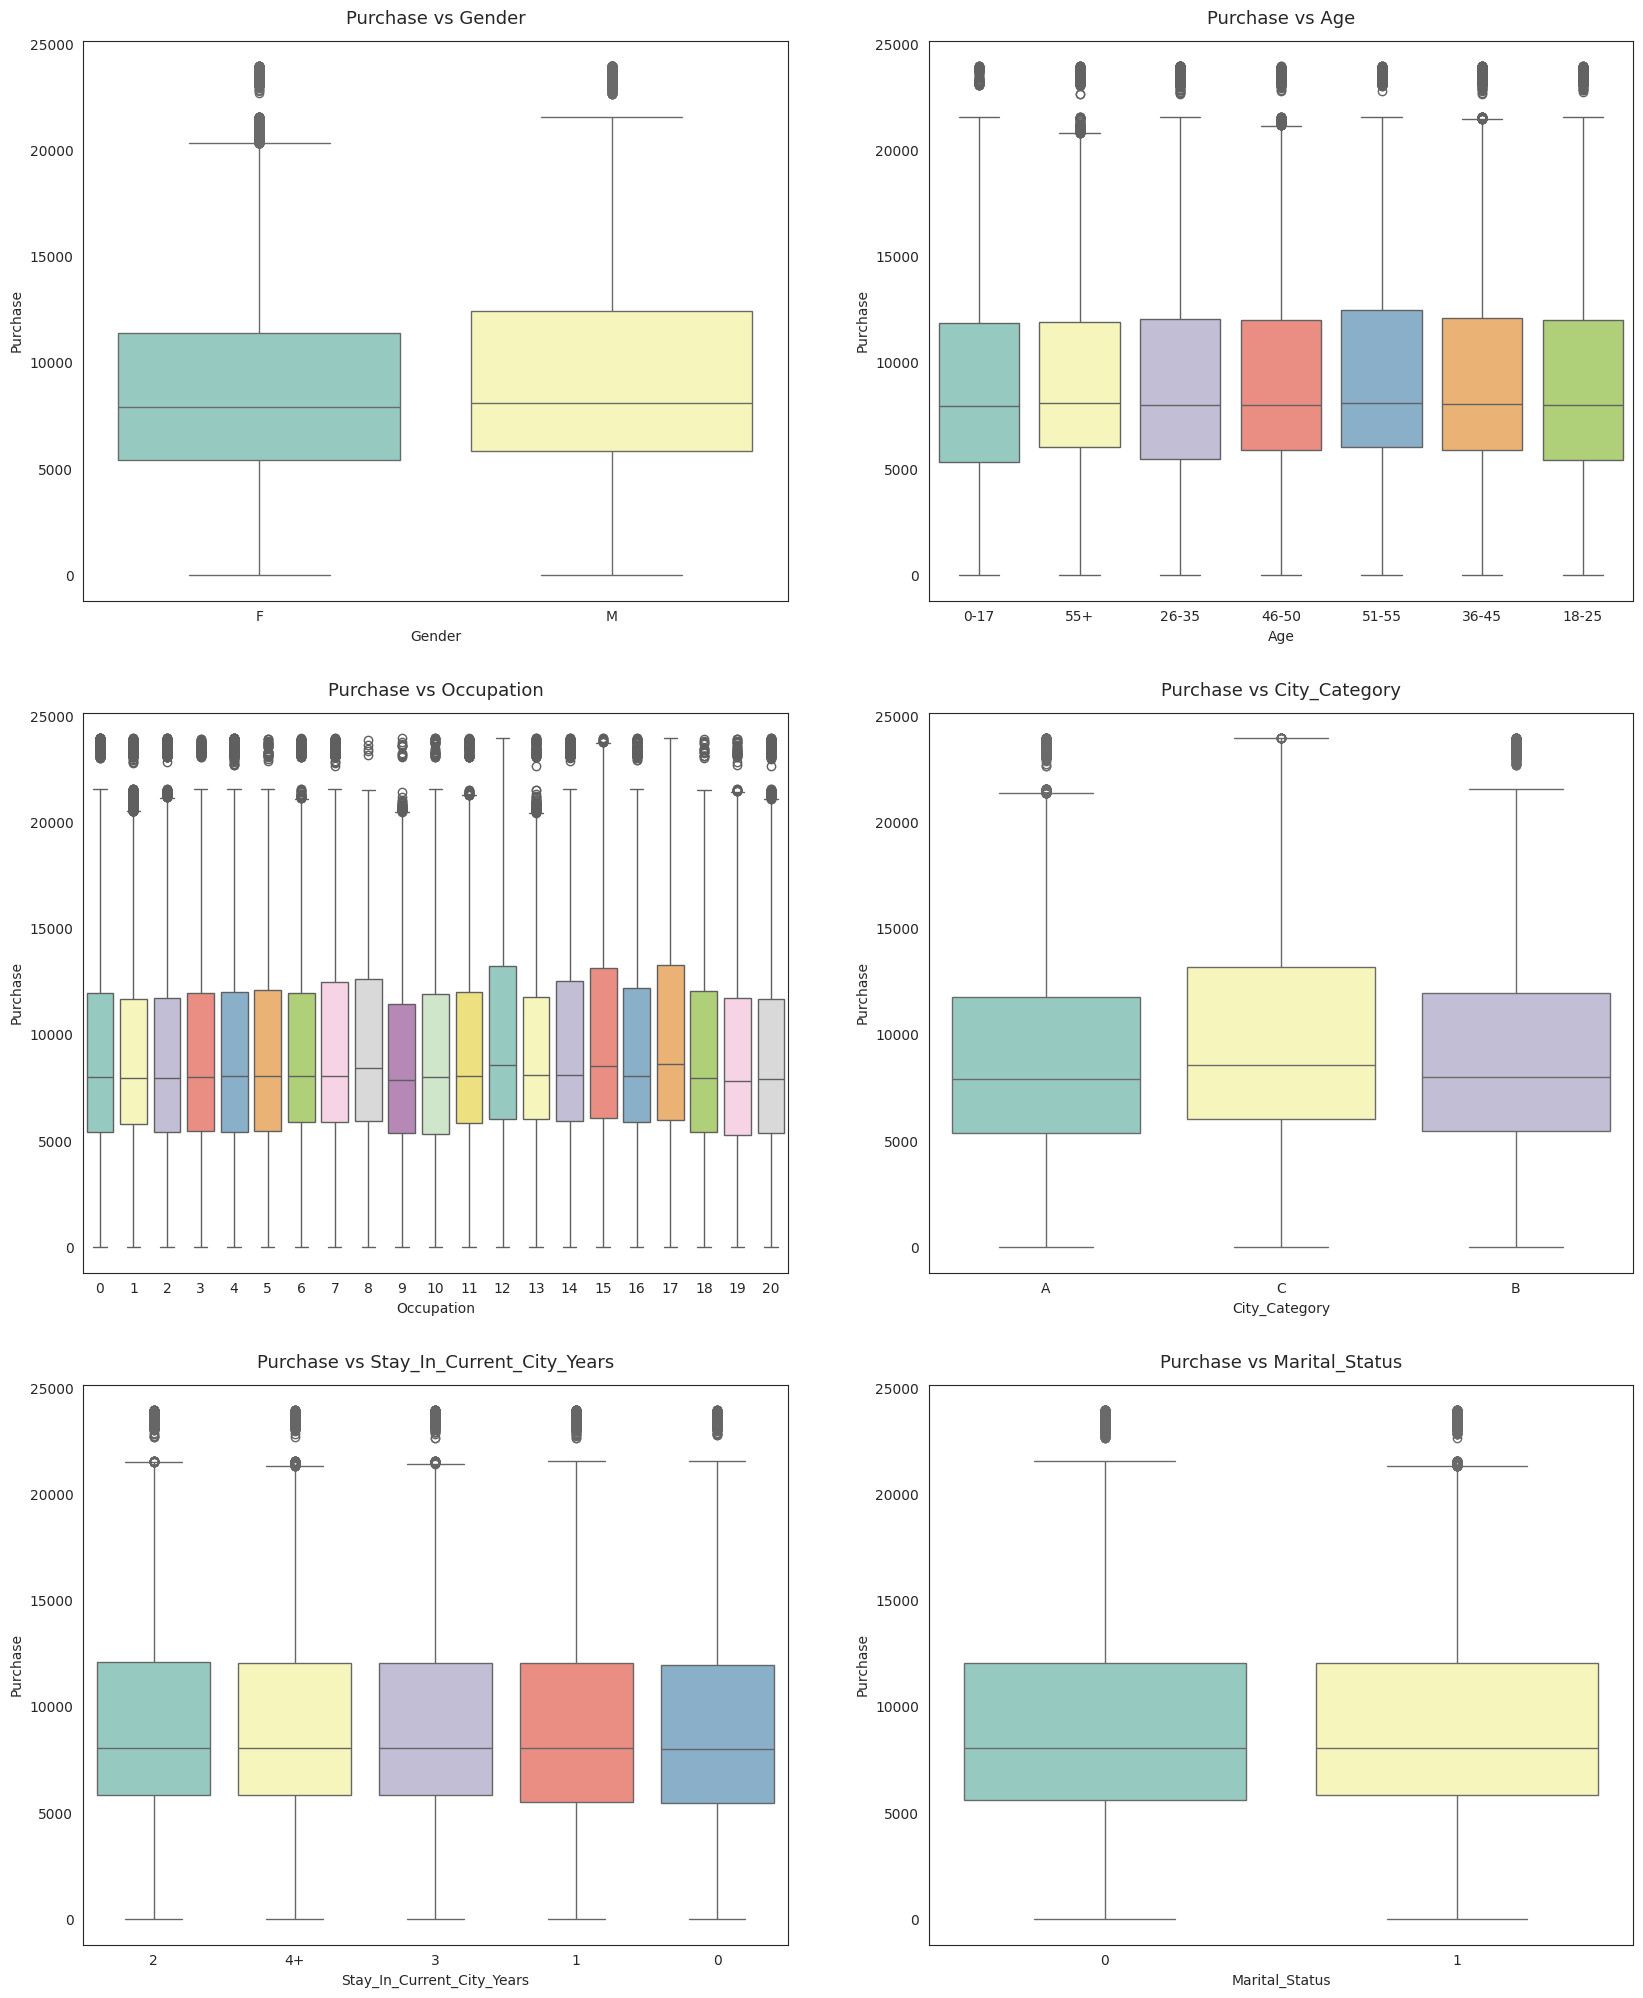

In [18]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set_style("white")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=attrs[count], ax=axs[row, col], palette='Set3')
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()


<ipython-input-19-962dca1427f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')


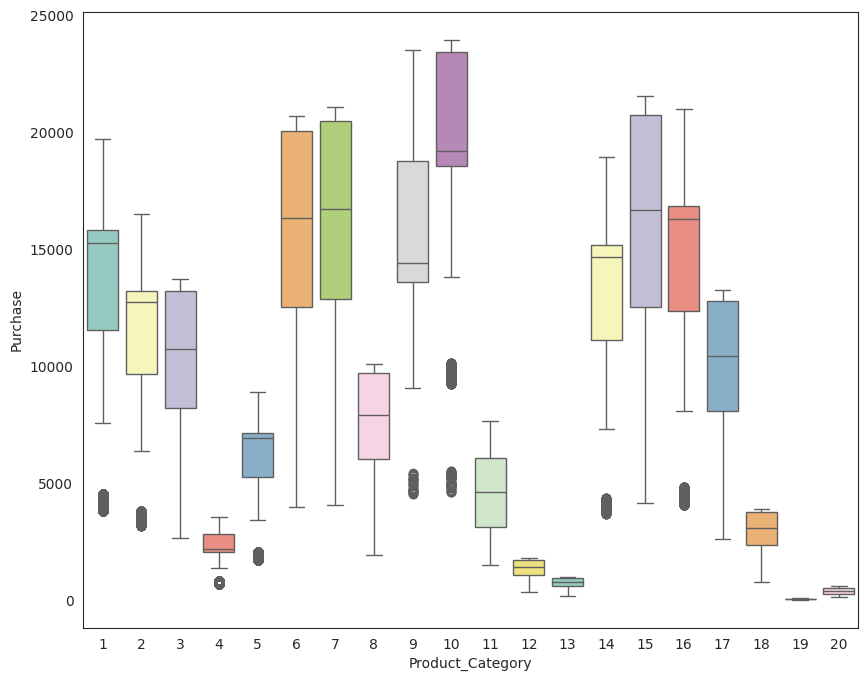

In [19]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Purchase', x=attrs[-1], palette='Set3')
plt.show()

### Multivariate Analysis

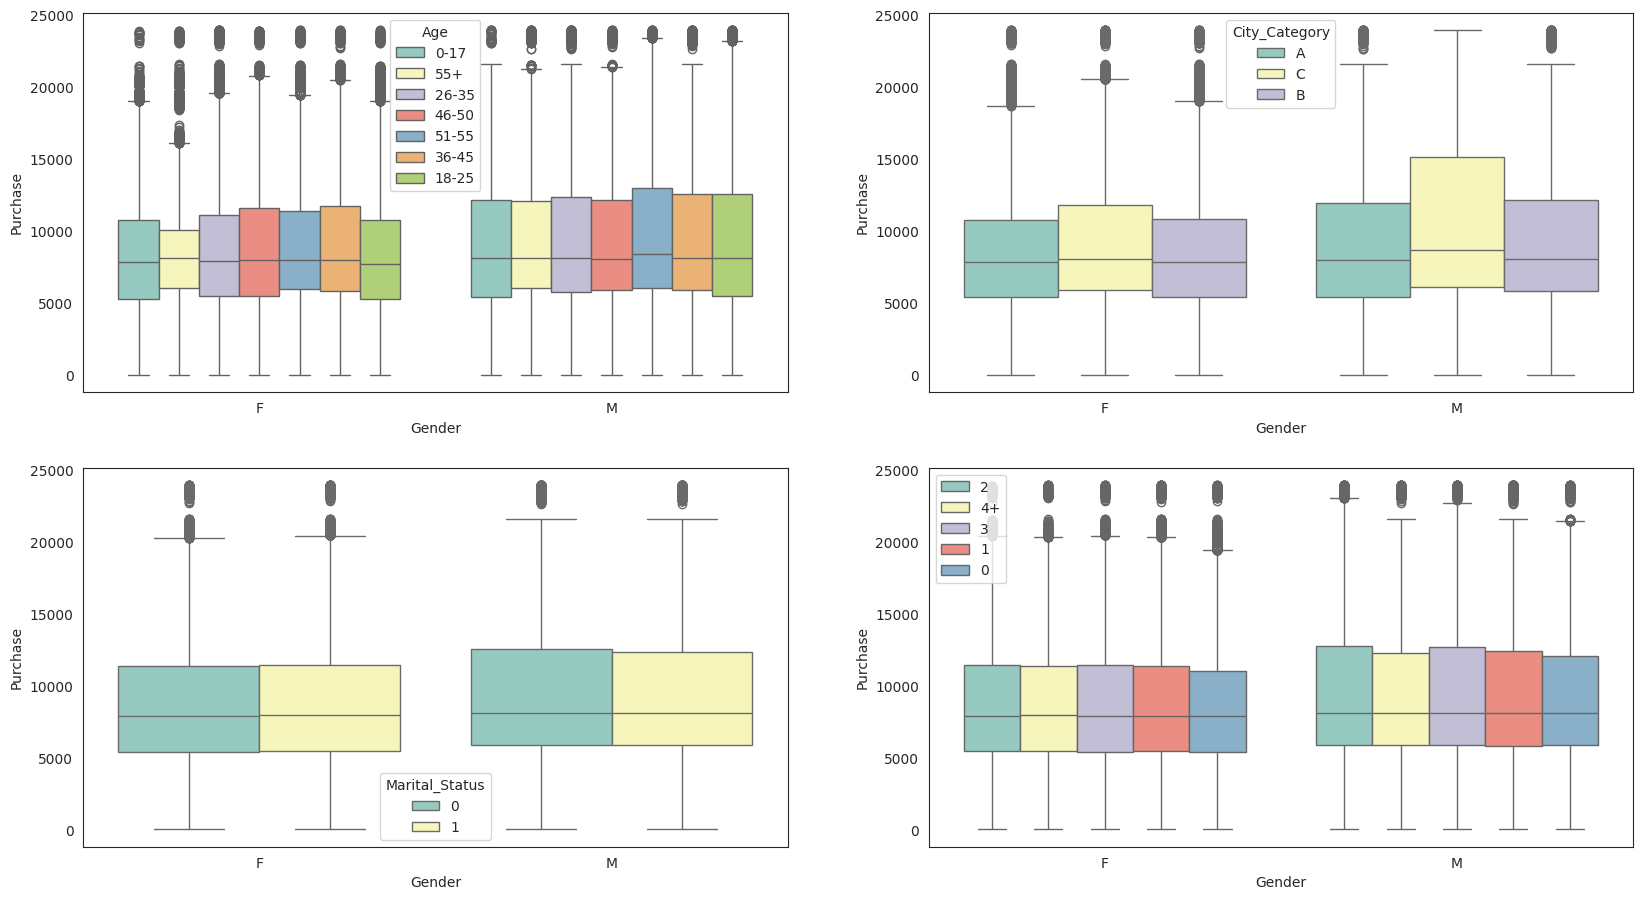

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

In [21]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


# Answering questions:

## 1)Are women spending more money per transaction than men? Why or Why not?

**Average amount spend per customer for Male and Female**

In [22]:
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [23]:
# Gender wise value counts in avg_amt_df
avg_amt_df = amt_df['Gender'].value_counts()
avg_amt_df

,count
Gender,
M,4225
F,1666


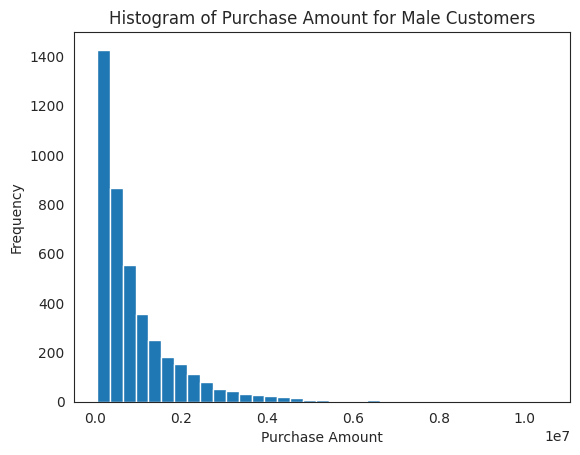

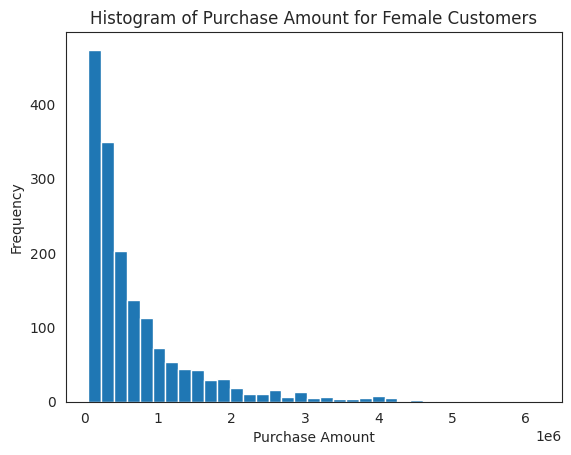

In [24]:
# histogram of average amount spent for each customer - Male & Female
plt.figure()  # Create a new figure

plt.hist(amt_df[amt_df['Gender']=='M']['Purchase'], bins=35)
plt.title("Histogram of Purchase Amount for Male Customers")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure()  # Create a new figure

plt.hist(amt_df[amt_df['Gender']=='F']['Purchase'], bins=35)
plt.title("Histogram of Purchase Amount for Female Customers")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()


In [25]:
male_avg = amt_df[amt_df['Gender']=='M']['Purchase'].mean()
female_avg = amt_df[amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


**Observation**

Male customers spend more money than female customers

1. The number of total males (4225) is greater than number of total females (1666).
2. Average amount spend by Male customers (925344.40) is greater than Average amount spend by Female customers(712024.39).

## 2)Confidence intervals and distribution of the mean of the expenses by female and male customers

**Sample Size:**

male_sample_size = 3000 <br>
female_sample_size = 1500

In [26]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [29]:
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

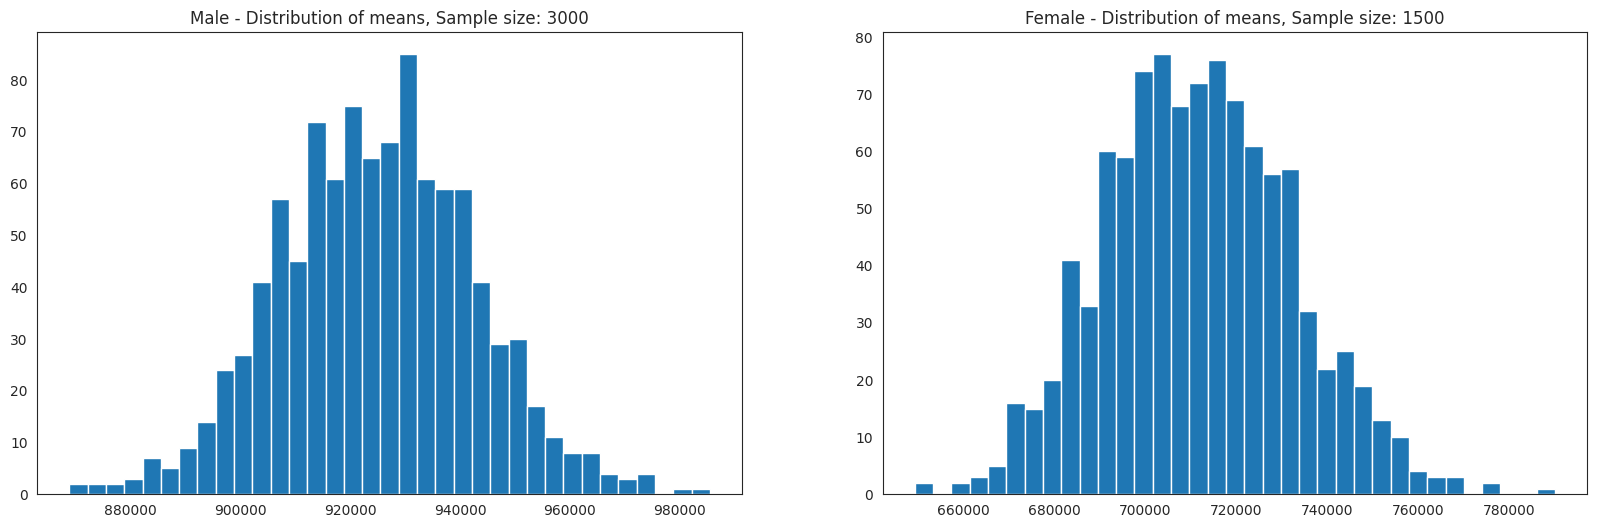

In [28]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 3000")
axis[1].set_title("Female - Distribution of means, Sample size: 1500")

plt.show()

In [30]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 924653.76
Population mean - Mean of sample means of amount spend for Female: 712523.71

Male - Sample mean: 925344.40 Sample std: 985830.10
Female - Sample mean: 712024.39 Sample std: 807370.73


**Observation:**

Now using the **Central Limit Theorem** for the **population** we can say that:
1. Average amount spend by male customers is **925344.40**
2. Average amount spend by female customers is **712024.39**

**Sample Size:**
    
male_sample_size = 300 <br>
female_sample_size = 150

In [31]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [32]:
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

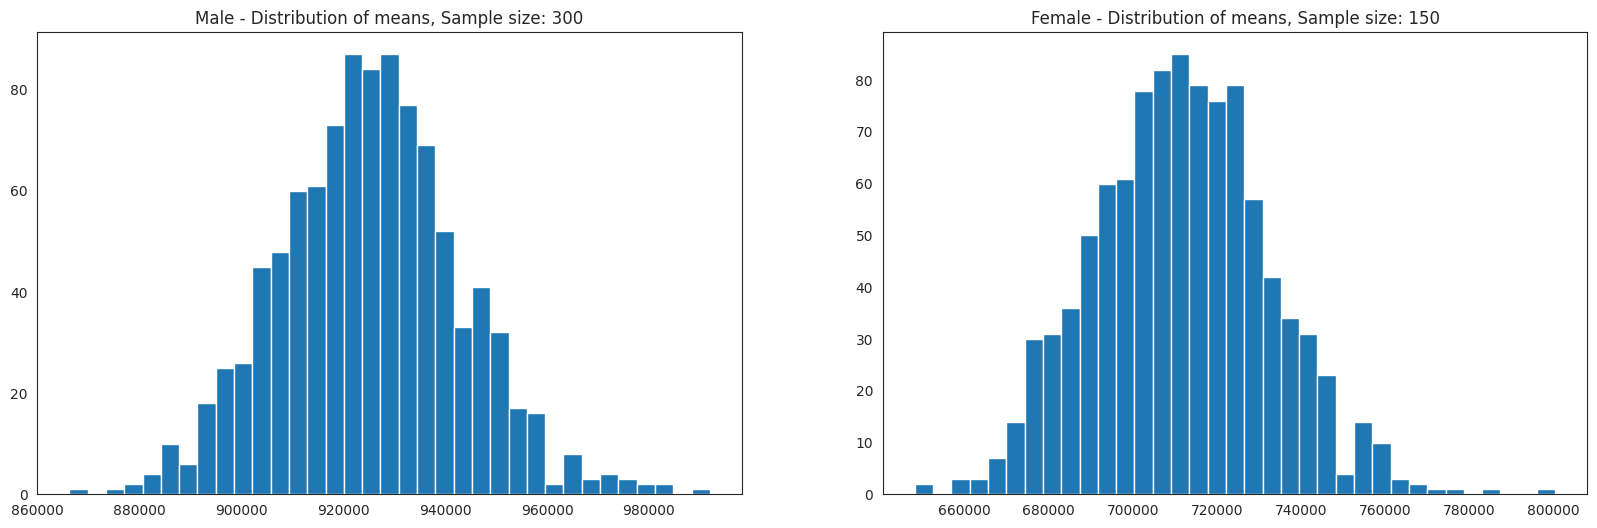

In [33]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 300")
axis[1].set_title("Female - Distribution of means, Sample size: 150")

plt.show()

In [34]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 925237.59
Population mean - Mean of sample means of amount spend for Female: 711445.27

Male - Sample mean: 925344.40 Sample std: 985830.10
Female - Sample mean: 712024.39 Sample std: 807370.73


**Sample Size:**

male_sample_size = 30000 <br>
female_sample_size = 15000

In [35]:
male_df = amt_df[amt_df['Gender']=='M']
female_df = amt_df[amt_df['Gender']=='F']

In [36]:
genders = ["M", "F"]

male_sample_size = 30000
female_sample_size = 15000
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

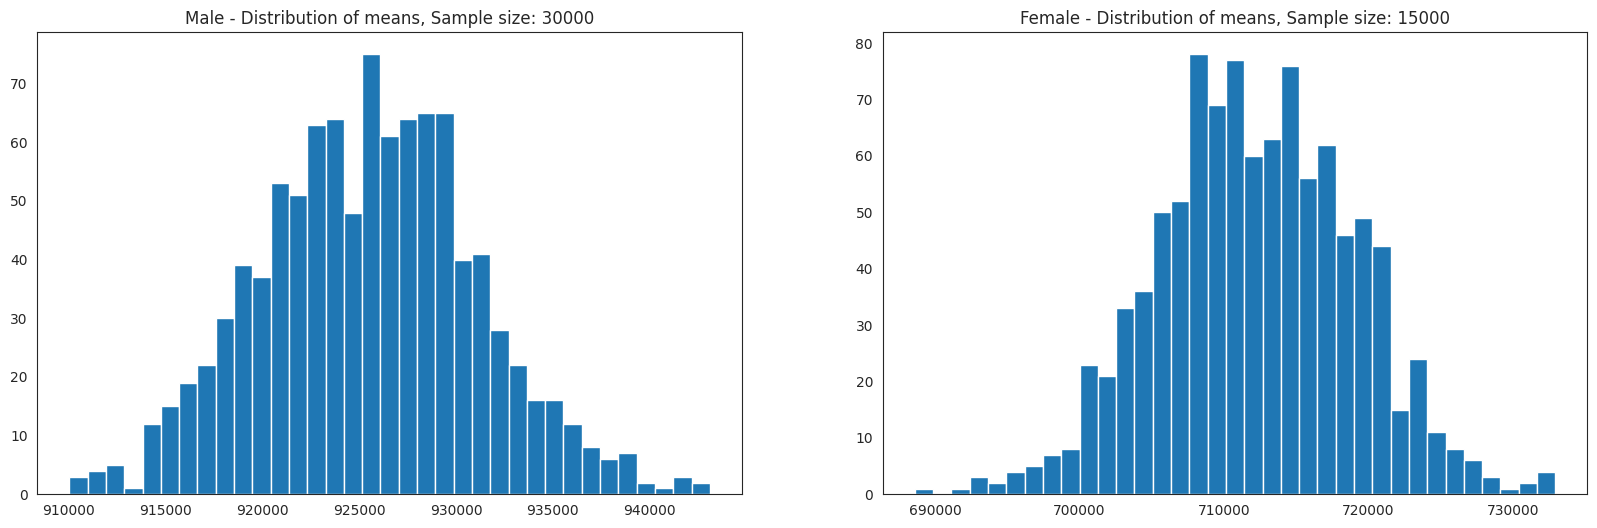

In [37]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male - Distribution of means, Sample size: 30000")
axis[1].set_title("Female - Distribution of means, Sample size: 15000")

plt.show()

In [38]:
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

Population mean - Mean of sample means of amount spend for Male: 925480.17
Population mean - Mean of sample means of amount spend for Female: 712196.39

Male - Sample mean: 925344.40 Sample std: 985830.10
Female - Sample mean: 712024.39 Sample std: 807370.73


**Observation:**

For sample size 300, 3000, and 30000:

Population mean - Mean of sample means of amount spend for Male:

300   -> 924972.04 <br>
3000  -> 925321.16 <br>
30000 -> 925406.43 <br>

Population mean - Mean of sample means of amount spend for Female:

150   -> 712298.71 <br>
1500  -> 711995.61 <br>
15000 -> 711949.28 <br>

We can clearly observe that Mean of sample means for different sample sizes are almost the same.

## 3)Are confidence intervals of average male and female spending overlapping?
## How can Walmart leverage this conclusion to make changes or improvements?

**Confidence Interval -> Z**

90% -> 1.645

95% -> 1.960

99% -> 2.576

**99% Confidence Interval:**

In [39]:
#99% Confidence Interval

male_margin_of_error_clt = 2.576*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 2.576*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("99% Confidence Interval:")
print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

99% Confidence Interval:
Male confidence interval of means: (886275.20, 964413.61)
Female confidence interval of means: (661070.03, 762978.76)


**Observation:**

For 99% Confidence Interval, the range for male & female is not overlapping.

Now we can infer about the population that, **99% of the times**:

1. Average amount spend by male customer will lie in between: **(886275.20, 964413.61)**
2. Average amount spend by female customer will lie in between: **(661070.03, 762978.76)**

**95% Confidence Interval:**

In [40]:
#95% Confidence Interval

male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("95% Confidence Interval:")
print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

95% Confidence Interval:
Male confidence interval of means: (895617.83, 955070.97)
Female confidence interval of means: (673254.77, 750794.02)


**Observation:**

For 95% Confidence Interval, the range for male & female is not overlapping.

Now we can infer about the population that, **95% of the times**:

1. Average amount spend by male customer will lie in between: **(895617.83, 955070.97)**
2. Average amount spend by female customer will lie in between: **(673254.77, 750794.02)**

**90% Confidence Interval:**

In [41]:
#90% Confidence Interval

male_margin_of_error_clt = 1.645*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.645*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("90% Confidence Interval:")
print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

90% Confidence Interval:
Male confidence interval of means: (900395.32, 950293.49)
Female confidence interval of means: (679485.60, 744563.19)


**Observation:**

For 90% Confidence Interval, the range for male & female is not overlapping.

Now we can infer about the population that, **90% of the times**:

1. Average amount spend by male customer will lie in between: **(900395.32, 950293.49)**
2. Average amount spend by female customer will lie in between: **(679485.60, 744563.19)**

## 4)Results when the same activity is performed for Married vs Unmarried

#### Doing the same process for married vs unmarried

In [42]:
amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [43]:
amt_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [44]:
amt_df['Marital_Status'].value_counts()

,count
Marital_Status,
0,3417
1,2474


**Sample Size:**

marid_samp_size = 3000 <br>
unmarid_sample_size = 2000

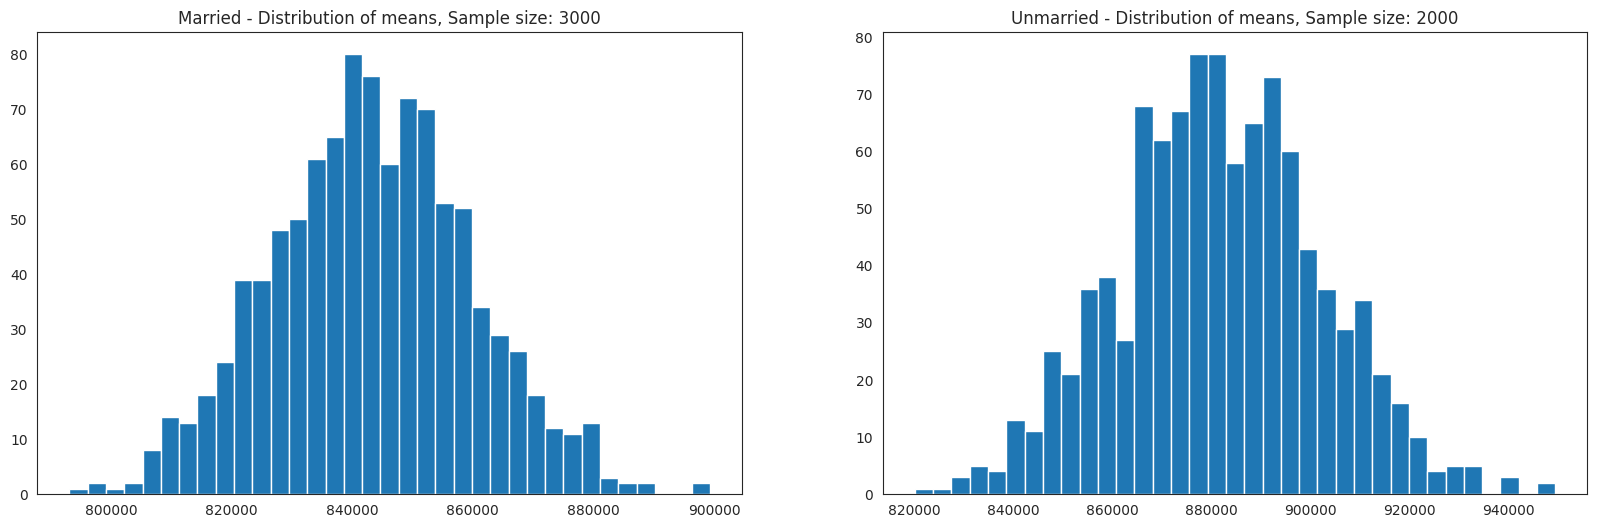

Population mean - Mean of sample means of amount spend for Married: 843307.93
Population mean - Mean of sample means of amount spend for Unmarried: 881601.18

Married - Sample mean: 843526.80 Sample std: 935352.12
Unmarried - Sample mean: 880575.78 Sample std: 949436.25


In [45]:
marid_samp_size = 3000
unmarid_sample_size = 2000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()

    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))


**Sample Size:**

marid_samp_size = 300 <br>
unmarid_sample_size = 200

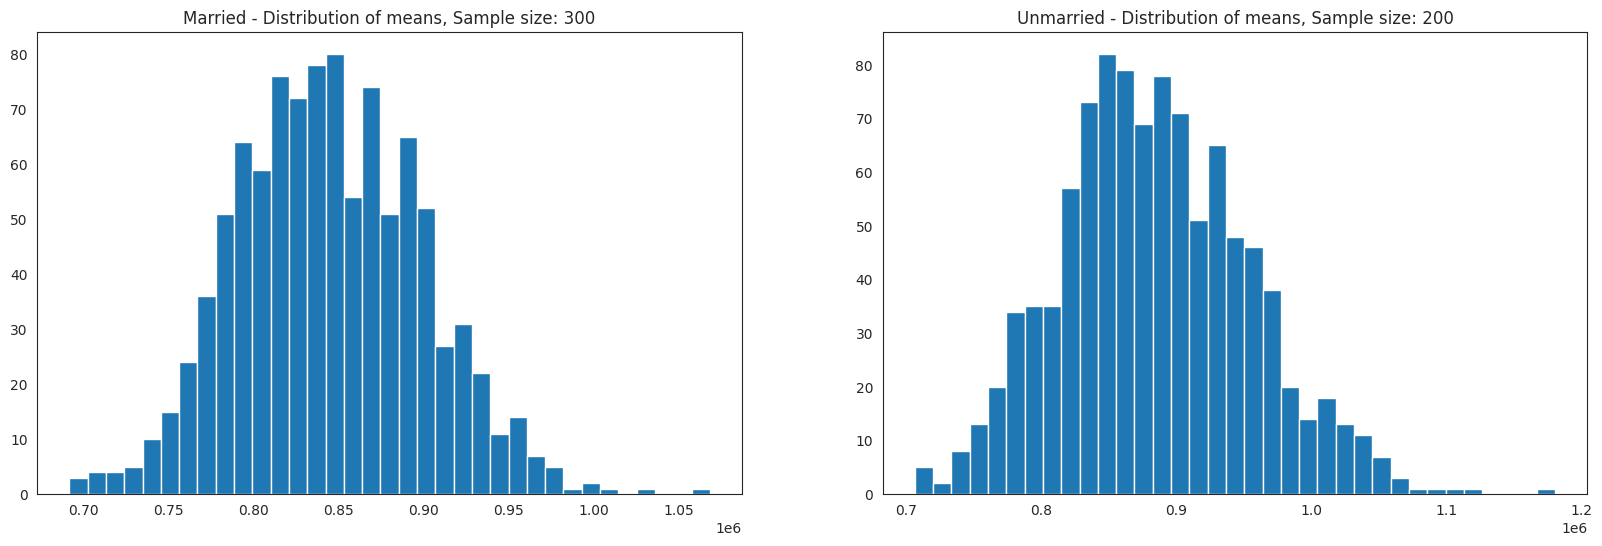

Population mean - Mean of sample means of amount spend for Married: 844544.32
Population mean - Mean of sample means of amount spend for Unmarried: 884225.50

Married - Sample mean: 843526.80 Sample std: 935352.12
Unmarried - Sample mean: 880575.78 Sample std: 949436.25


In [46]:
marid_samp_size = 300
unmarid_sample_size = 200
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()

    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 300")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 200")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))


**Sample Size:**
    
marid_samp_size = 30000 <br>
unmarid_sample_size = 20000

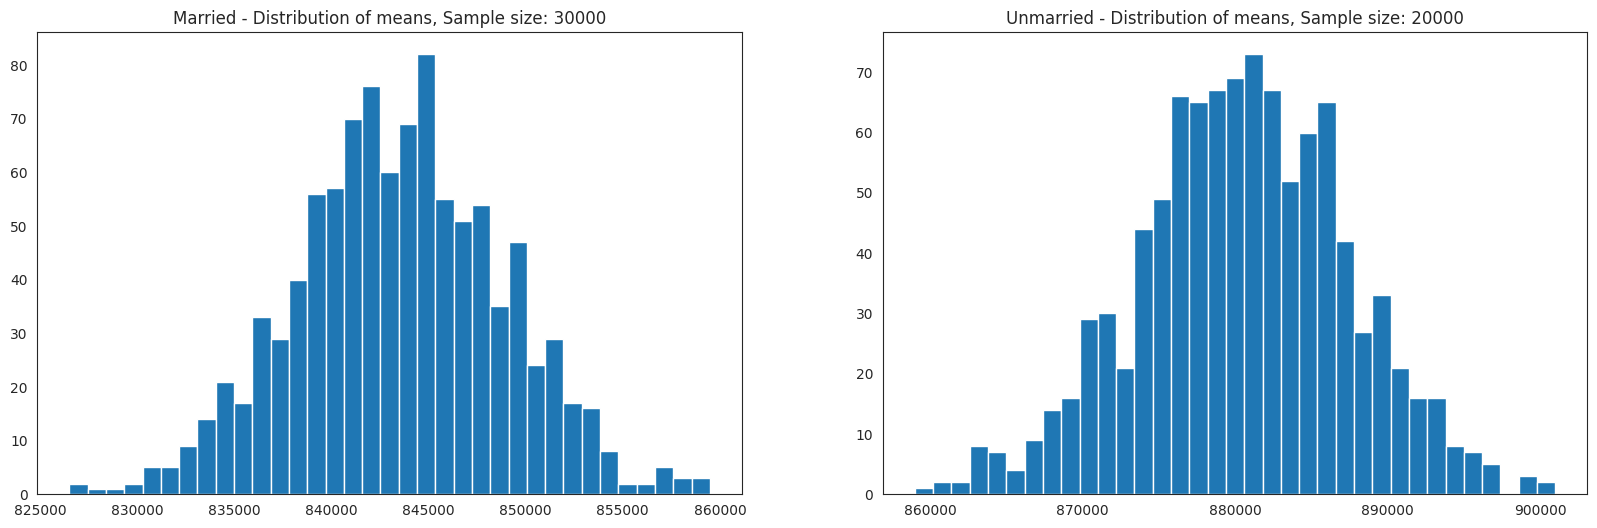

Population mean - Mean of sample means of amount spend for Married: 843502.51
Population mean - Mean of sample means of amount spend for Unmarried: 880481.51

Married - Sample mean: 843526.80 Sample std: 935352.12
Unmarried - Sample mean: 880575.78 Sample std: 949436.25


In [47]:
marid_samp_size = 30000
unmarid_sample_size = 20000
num_repitions = 1000
marid_means = []
unmarid_means = []

for _ in range(num_repitions):
    marid_mean = amt_df[amt_df['Marital_Status']==1].sample(marid_samp_size, replace=True)['Purchase'].mean()
    unmarid_mean = amt_df[amt_df['Marital_Status']==0].sample(unmarid_sample_size, replace=True)['Purchase'].mean()

    marid_means.append(marid_mean)
    unmarid_means.append(unmarid_mean)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(marid_means, bins=35)
axis[1].hist(unmarid_means, bins=35)
axis[0].set_title("Married - Distribution of means, Sample size: 30000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 20000")

plt.show()

print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(marid_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarid_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==1]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(amt_df[amt_df['Marital_Status']==0]['Purchase'].mean(), amt_df[amt_df['Marital_Status']==0]['Purchase'].std()))


**Observation:**

For sample size 300, 3000, and 30000:

Population mean - Mean of sample means of amount spend for Married:

300   -> 843184.78 <br>
3000  -> 844173.99 <br>
30000 -> 843465.84 <br>

Population mean - Mean of sample means of amount spend for Unmarried:

150   -> 879775.58 <br>
1500  -> 880847.26 <br>
15000 -> 880747.41 <br>

We can clearly observe that Mean of sample means for different sample sizes are almost the same.

**Confidence Interval -> Z**

80% -> 1.282 <br>
85% -> 1.440 <br>
90% -> 1.645 <br>
95% -> 1.960 <br>
99% -> 2.576 <br>

**99% Confidence Interval:**

In [48]:
#99% Confidence Interval

print("99% Confidence Interval:")
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 2.576*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

99% Confidence Interval:
Married confidence interval of means: (795084.90, 891968.69)
Unmarried confidence interval of means: (838736.02, 922415.54)


**Observation:**

For 99% Confidence Interval: <br>
The confidence interval of means of Married and Unmarried is overlapping.<br>
So, we reduce the Confidence Interval to 95% and try again.

**95% Confidence Interval:**

In [49]:
#95% Confidence Interval

print("95% Confidence Interval:")
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

95% Confidence Interval:
Married confidence interval of means: (806668.83, 880384.76)
Unmarried confidence interval of means: (848741.18, 912410.38)


**Observation:**

For 95% Confidence Interval: <br>
The confidence interval of means of Married and Unmarried is overlapping.<br>
So, we reduce the Confidence Interval to 90% and try again.

**90% Confidence Interval:**

In [50]:
#90% Confidence Interval

print("90% Confidence Interval:")
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 1.645*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

90% Confidence Interval:
Married confidence interval of means: (812592.43, 874461.16)
Unmarried confidence interval of means: (853857.46, 907294.11)


**Observation:**

For 90% Confidence Interval: <br>
The confidence interval of means of Married and Unmarried is overlapping.<br>
So, we reduce the Confidence Interval to 85% and try again.

**85% Confidence Interval:**

In [51]:
#85% Confidence Interval

print("85% Confidence Interval:")
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 1.440*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

85% Confidence Interval:
Married confidence interval of means: (816447.48, 870606.12)
Unmarried confidence interval of means: (857187.10, 903964.47)


**Observation:**

For 85% Confidence Interval: <br>
The confidence interval of means of Married and Unmarried is overlapping.<br>
So, we reduce the Confidence Interval to 80% and try again.

**80% Confidence Interval:**

In [ ]:
#80% Confidence Interval

print("80% Confidence Interval:")
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = amt_df[amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 1.282*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

80% Confidence Interval:
Married confidence interval of means: (819418.68, 867634.91)
Unmarried confidence interval of means: (859753.36, 901398.21)


**Observation:**

For 80% Confidence Interval: <br>
The confidence interval of means of Married and Unmarried is overlapping.<br>
But the overlapping has significantly reduced.

Now we can infer about the population that, **80% of the times**:

1. Average amount spend by Married customer will lie in between: **(819418.68, 867634.91)**
2. Average amount spend by Unmarried customer will lie in between: **(859753.36, 901398.21)**

## 5)Results when the same activity is performed for Age

### Calculating the average amount spent by Age

In [ ]:
amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [ ]:
amt_df['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [ ]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = amt_df[amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

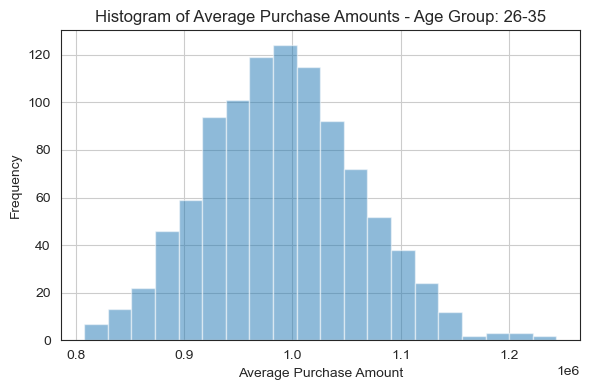

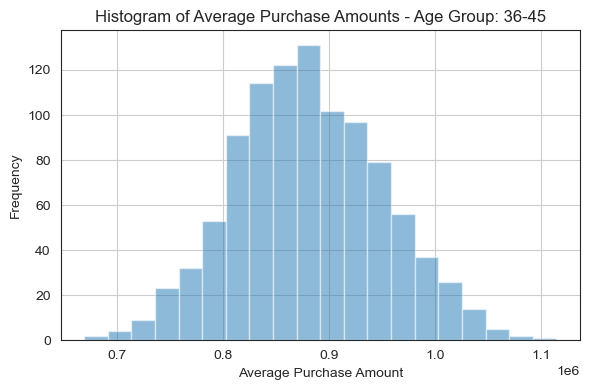

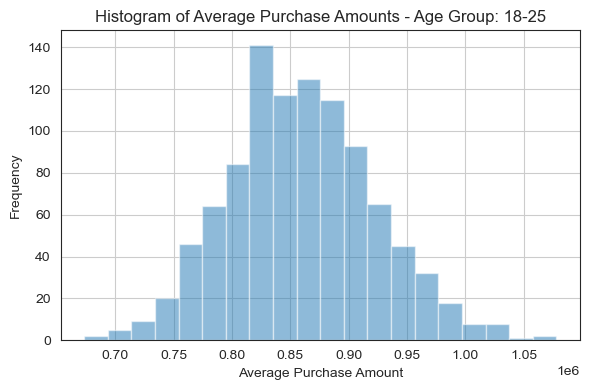

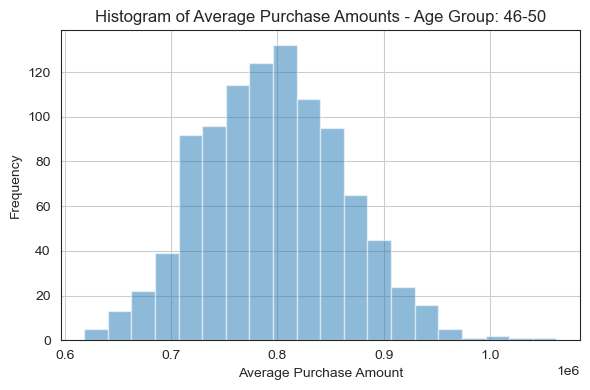

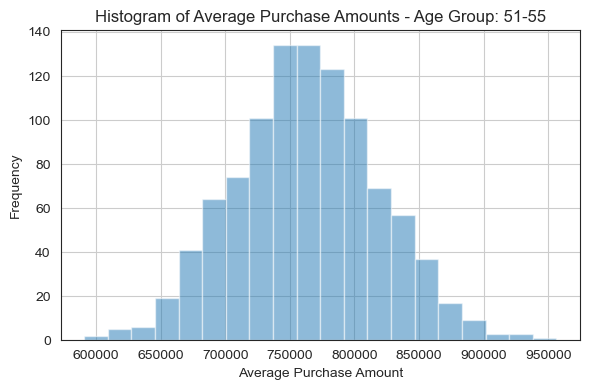

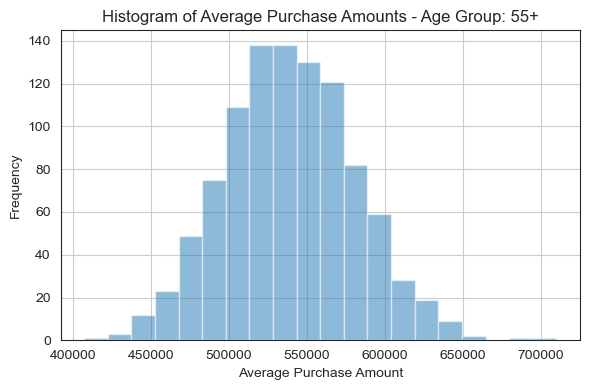

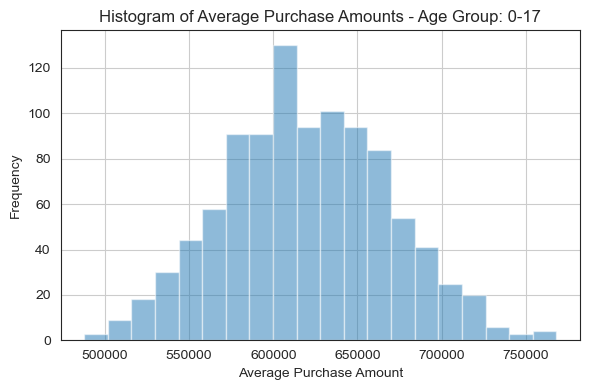

In [ ]:
# Create separate histogram plots for each age group's average purchase amounts
for age_interval in age_intervals:
    plt.figure(figsize=(6, 4))  # Adjust the figure size here
    plt.hist(all_means[age_interval], bins=20, alpha=0.5)
    plt.title(f"Histogram of Average Purchase Amounts - Age Group: {age_interval}")
    plt.xlabel("Average Purchase Amount")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()  # Ensures plots are well-arranged
    plt.show()

**99% Confidence Interval:**

In [ ]:
#99% Confidence Interval

for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = amt_df[amt_df['Age']==val]

    margin_of_error_clt = 2.576*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (931009.46, 1048309.18)
For age 36-45 --> confidence interval of means: (805647.89, 953683.53)
For age 18-25 --> confidence interval of means: (784903.24, 924823.00)
For age 46-50 --> confidence interval of means: (688663.50, 896434.06)
For age 51-55 --> confidence interval of means: (670138.33, 856263.52)
For age 55+ --> confidence interval of means: (457227.15, 622167.34)
For age 0-17 --> confidence interval of means: (498997.92, 738737.71)


**95% Confidence Interval:**

In [ ]:
#95% Confidence Interval

for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = amt_df[amt_df['Age']==val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
For age 55+ --> confidence interval of means: (476948.26, 602446.23)
For age 0-17 --> confidence interval of means: (527662.46, 710073.17)


**Observation**

**90% Confidence Interval:**

In [ ]:
#90% Confidence Interval

for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = amt_df[amt_df['Age']==val]

    margin_of_error_clt = 1.645*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (952206.28, 1027112.35)
For age 36-45 --> confidence interval of means: (832398.89, 926932.53)
For age 18-25 --> confidence interval of means: (810187.65, 899538.59)
For age 46-50 --> confidence interval of means: (726209.00, 858888.57)
For age 51-55 --> confidence interval of means: (703772.36, 822629.48)
For age 55+ --> confidence interval of means: (487032.92, 592361.57)
For age 0-17 --> confidence interval of means: (542320.46, 695415.16)


# 📊 Insights 📊

## Age Distribution 🎂
- ~ 80% of the users are aged between 18-50:
    - 40%: 26-35 📅
    - 18%: 18-25 🎈
    - 20%: 36-45 🗓️
    
## Gender Ratio 👫
- 75% of the users are Male ♂️ and 25% are Female ♀️
    
## Marital Status 👩‍❤️‍👨
- 60% are Single 👤 and 40% are Married 👫
    
## City Residency 🏙️
- 35% have been staying in the city for 1 year 🏠
- 18% have been staying for 2 years 🏠🏠
- 17% have been staying for 3 years 🏠🏠🏠
    
## Product Categories 🛍️
- Total of 20 product categories available 📦
    
## Occupations 💼
- 20 different types of occupations in the city 👔

## User Demographics 📊
- Most users are Male ♂️
- 20 different types of Occupations and Product Categories 📋
- Majority of users belong to City Category B 🏙️
- More users are Single compared to Married 👤 vs 👫
- Product Categories 1, 5, 8, & 11 have the highest purchasing frequency 🛒🔝

## Average Spending 💰
- Average amount spent by Male customers: ₹925,344.40 💸
- Average amount spent by Female customers: ₹712,024.39 💸

## Confidence Intervals 📈

## Gender-wise

Now using the **Central Limit Theorem** for the **population**:

1. Average amount spend by **male** customers is **9,26,341.86**
2. Average amount spend by **female** customers is **7,11,704.09**

For **99% Confidence Interval**: <br>
Now we can infer about the population that, **99% of the times**:

1. Average amount spend by male customer will lie in between: **(886275.20, 964413.61)**
2. Average amount spend by female customer will lie in between: **(661070.03, 762978.76)**


## Marital Status-wise

Now using the **Central Limit Theorem** for the **population**:

1. Average amount spend by **Married** customers is **844173.99**
2. Average amount spend by **Unmarried** customers is **880847.26**
  

For **80% Confidence Interval**: <br>
The confidence interval of means of Married and Unmarried is overlapping.<br>
But the overlapping has significantly reduced.

Now we can infer about the population that, **80% of the times**:

1. Average amount spend by Married customer will lie in between: **(819418.68, 867634.91)**
2. Average amount spend by Unmarried customer will lie in between: **(859753.36, 901398.21)**

## Age-wise

For **90% Confidence Interval**: <br>

1. For **age 26-35** --> confidence interval of means: **(952206.28, 1027112.35)**
2. For **age 36-45** --> confidence interval of means: **(832398.89, 926932.53)**
3. For **age 18-25** --> confidence interval of means: **(810187.65, 899538.59)**
4. For **age 46-50** --> confidence interval of means: **(726209.00, 858888.57)**
5. For **age 51-55** --> confidence interval of means: **(703772.36, 822629.48)**
6. For **age 55+** --> confidence interval of means: **(487032.92, 592361.57)**
7. For **age 0-17** --> confidence interval of means: **(542320.46, 695415.16)**


# 💡 Recommendations 💡
## 1) Gender-focused Strategy 🚹🚺
- Men tend to spend more than women. The company should prioritize retaining existing male customers and attracting new male customers.
    
## 2) Product Category Insight 🛍️
- Products in categories 1, 5, 8, & 11 have the highest purchasing frequency and are favored by customers. The company can consider increasing the promotion and availability of these products, as well as boosting less-purchased items.
    
## 3) Marital Status Approach 💑
- Unmarried customers exhibit higher spending compared to married customers. The company should concentrate on attracting and engaging unmarried customers.
    
## 4) Targeting Specific Age Group 🎈
- Customers aged 18-45 contribute more to the spending. To enhance revenue, the company should focus on acquiring customers within this age range.
    
## 5) City Category Strategy 🏙️
- Male customers residing in City_Category C demonstrate higher spending compared to those in City_Category B or A. To increase revenue, the company should consider emphasizing product offerings in City_Category C.


Thanks and Regards - Ketan Taunk